### **Importing Necessary Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

### **Importing Electricity Cost Dataset**


In [2]:
file_path = "../Data/electricity_cost_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


### **Exploratory Data Analysis**


In [3]:
df.describe(include="all")

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2757.775100,NaN,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,NaN,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,NaN,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,NaN,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,NaN,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,NaN,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000


In [4]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [5]:
df.isnull().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [6]:
df["structure type"].value_counts()

structure type
Residential    3939
Commercial     3005
Mixed-use      2052
Industrial     1004
Name: count, dtype: int64

In [7]:
## ** Apply label encoding on structure type column and create a new column to check the correlation and make model's independent feature numeric **

df["structure_type_le"] = np.where(df["structure type"] == "Residential",1,
                                   np.where(df["structure type"]=="Commercial",2,
                                            np.where(df["structure type"]=="Mixed-use",3,4)))

In [8]:
structure_type_le_column = df.pop("structure_type_le")
df.insert(2,"structure_type_le",structure_type_le_column)

In [9]:
df.sample(10)

,site area,structure type,structure_type_le,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
1453,909,Residential,1,1479.0,36,72,89,64,20,1391.0
6072,3090,Industrial,4,1251.0,73,62,53,18,0,3447.0
4164,4470,Residential,1,6491.0,76,86,164,60,166,4305.0
2968,3245,Mixed-use,3,4433.0,72,72,93,46,109,2649.0
4771,1404,Commercial,2,2508.0,50,77,48,33,0,1766.0
3296,542,Residential,1,1048.0,77,90,12,65,26,1355.0
1579,4793,Industrial,4,9142.0,87,75,103,69,0,5514.0
7312,4549,Residential,1,8793.0,64,30,136,22,420,5175.0
6903,1418,Residential,1,2657.0,27,89,140,58,34,2204.0
3238,4586,Commercial,2,8910.0,12,85,30,48,0,4741.0


In [10]:
df.corr(numeric_only=True)

,site area,structure_type_le,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
site area,1.000000,0.003083,0.745372,0.006786,0.019681,-0.003770,0.007520,0.360160,0.874376
structure_type_le,0.003083,1.000000,-0.010269,-0.003215,-0.002025,-0.006045,0.017884,-0.263629,-0.052342
water consumption,0.745372,-0.010269,1.000000,0.006977,0.008711,0.000929,0.007786,0.281256,0.698775
recycling rate,0.006786,-0.003215,0.006977,1.000000,-0.022350,-0.011125,-0.005641,-0.008540,-0.012536
utilisation rate,0.019681,-0.002025,0.008711,-0.022350,1.000000,-0.008747,-0.000795,0.012424,0.207215
air qality index,-0.003770,-0.006045,0.000929,-0.011125,-0.008747,1.000000,-0.027277,0.013728,0.017376
issue reolution time,0.007520,0.017884,0.007786,-0.005641,-0.000795,-0.027277,1.000000,-0.014663,0.042325
resident count,0.360160,-0.263629,0.281256,-0.008540,0.012424,0.013728,-0.014663,1.000000,0.361609
electricity cost,0.874376,-0.052342,0.698775,-0.012536,0.207215,0.017376,0.042325,0.361609,1.000000


<Axes: >

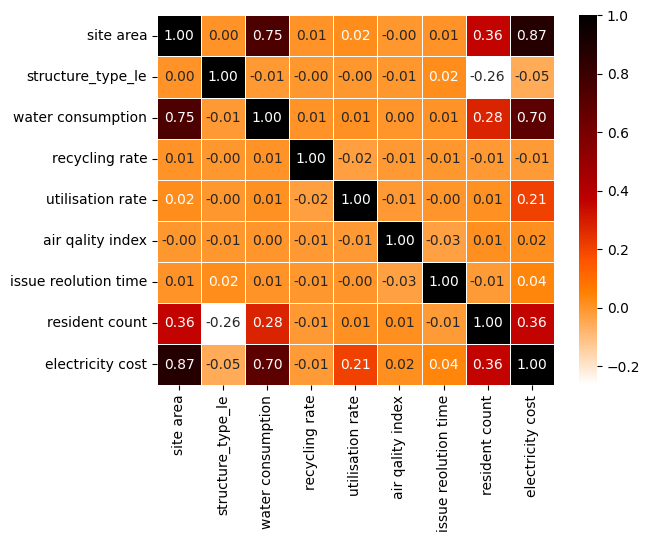

In [11]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True,cmap="gist_heat_r",fmt="0.2f",linewidths=0.5)

In [12]:
x_axes = df.columns[0:-1]
x_axes = x_axes.drop(["structure type"])
x_axes

Index(['site area', 'structure_type_le', 'water consumption', 'recycling rate',
       'utilisation rate', 'air qality index', 'issue reolution time',
       'resident count'],
      dtype='object')

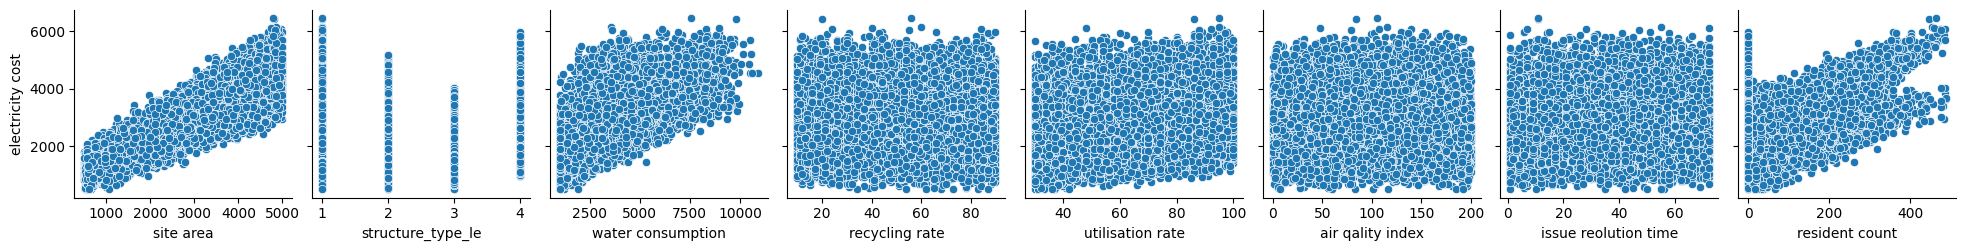

In [28]:
sns.pairplot(df,x_vars=x_axes,y_vars="electricity cost")

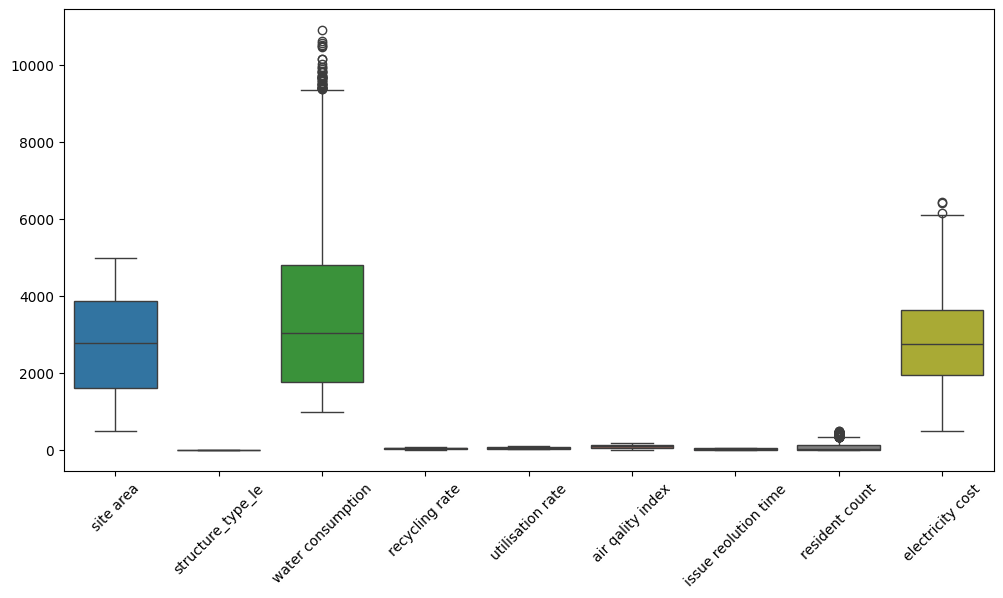

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### **Feature Engineering**


In [ ]:
## Create a copy of original dataframe to test the model
model_df = df

In [ ]:
## Dropped the string/object column
model_df.drop("structure type",axis=1,inplace=True)

In [42]:
model_df.rename(columns={
    "site area":"site_area",
    "structure_type_le":"structure_type",
    "water consumption":"water_consumption",
    "recycling rate":"recycling_rate",
    "utilisation rate":"utilization_rate",
    "air qality index":"air_quality_index",
    "issue reolution time":"issue_resolution_time",
    "resident count":"resident_count",
    "electricity cost":"electricity_cost"},inplace=True)

In [ ]:
## Save the cleaned data for future use cases
model_df.to_csv("../Data/electricity_cost_cleaned_dataset.csv")

### **Model Creation**


In [55]:
## Assign independent and dependent feature in variable x & y respectively

x = model_df[model_df.columns[0:-1]]
y = model_df["electricity_cost"]

In [60]:
## Splitting the whole dataset into *TRAIN* (train & validate the model) and *TEST* (test the model for accuracy) data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2025)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7500, 8), (2500, 8), (7500,), (2500,))

In [64]:
## Standardize all the independent features using *Z-SCORE*, mean = 0, std = 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## In transform we used the mean and standard deviation from the train data (Counter Data Leakage)

In [73]:
x_train_scaled.std(),x_test_scaled.std(),x_train_scaled.mean(),x_test_scaled.mean()

(np.float64(1.0),
 np.float64(0.9992304323667728),
 np.float64(-1.0480505352461477e-17),
 np.float64(-0.0018300991433305583))

In [74]:
## Created a multiple linear regression model

from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [77]:
regression.coef_,regression.intercept_

(array([860.06710724, -50.00680745, 121.65996011, -18.4337355 ,
        207.77698695,  23.64420225,  44.17512428,  37.73622207]),
 np.float64(2833.1578666666665))

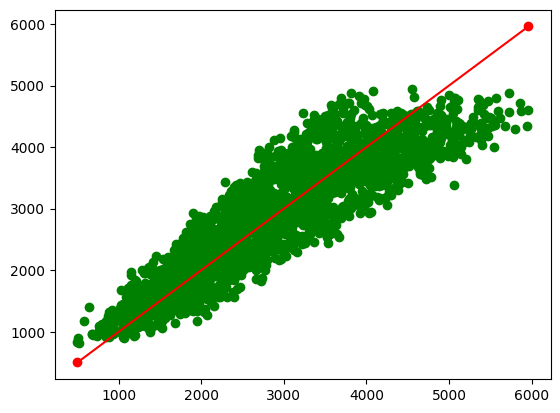

In [96]:
plt.scatter(y_test,regression.predict(x_test_scaled),color="g")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"or-")
plt.show()

In [ ]:
## Model Performance Check Based On Different Performance Metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse = mean_squared_error(y_test,regression.predict(x_test_scaled))
mae = mean_absolute_error(y_test,regression.predict(x_test_scaled))
rmse = np.sqrt(mse)
r2 = r2_score(y_test,regression.predict(x_test_scaled))
adjusted_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-len(x.columns)-1)

## RMSE = Square root of MSE
## Adjusted_R2 = 1-(1-R2)*(n-1)/(n-p-1) [n = No. of data points, p = No. of independent features]

In [108]:
mse,mae,rmse,r2,adjusted_r2

(235004.0879275279,
 376.5732774400884,
 np.float64(484.77220209860207),
 0.8065595596196262,
 0.805938313725189)

### **Model Lasso Regression With Manual Alpha = 60**


In [125]:
from sklearn.linear_model import Lasso
l_regression = Lasso(alpha=60)
l_regression.fit(x_train_scaled,y_train)

,alpha,60
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [126]:
l_regression.coef_,l_regression.intercept_

(array([836.9107314 ,  -0.        ,  88.9493104 ,  -0.        ,
        149.30678916,   0.        ,   0.        ,   8.29718323]),
 np.float64(2833.1578666666665))

In [130]:
x.columns

Index(['site_area', 'structure_type', 'water_consumption', 'recycling_rate',
       'utilization_rate', 'air_quality_index', 'issue_resolution_time',
       'resident_count'],
      dtype='object')

In [157]:
l_r2 = r2_score(y_test,l_regression.predict(x_test_scaled))
l_mae = mean_absolute_error(y_test,l_regression.predict(x_test_scaled))
l_mse = mean_squared_error(y_test,l_regression.predict(x_test_scaled))
l_rmse = np.sqrt(l_mse)
l_adjusted_r2 = 1-(1-l_r2)*(len(y_test)-1)/(len(y_test)-len(x.columns)-1)

In [158]:
l_mse,l_mae,l_rmse,l_r2,l_adjusted_r2

(250431.75545035562,
 392.61891764268233,
 np.float64(500.43156919838265),
 0.7938604835057754,
 0.7931984537458582)

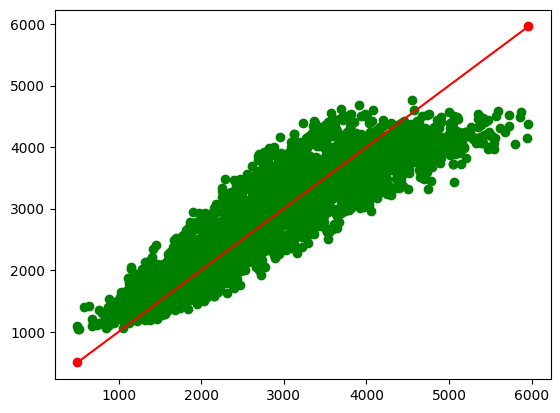

In [ ]:
plt.scatter(y_test,l_regression.predict(x_test_scaled),color="g")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"or-")
plt.show()

### **Model Lasso CV With Auto Pick Alpha = 0.97**


In [ ]:
from sklearn.linear_model import LassoCV
l_r_c = LassoCV(cv=10,random_state=2025)
l_r_c.fit(x_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,10
,verbose,False
,n_jobs,None


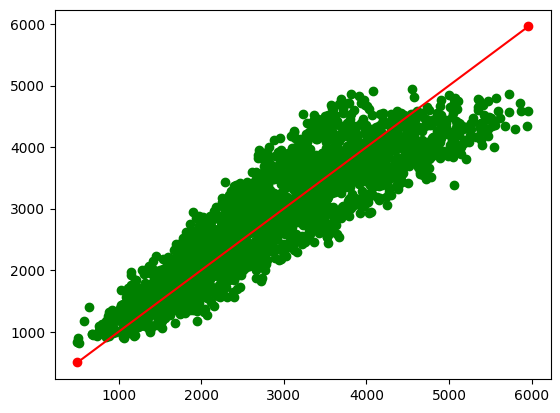

In [152]:
plt.scatter(y_test,l_r_c.predict(x_test_scaled),color="g")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"or-")
plt.show()

In [155]:
l_cv_mse = mean_squared_error(y_test,l_r_c.predict(x_test_scaled))
l_cv_mae = mean_absolute_error(y_test,l_r_c.predict(x_test_scaled))
l_cv_rmse = np.sqrt(mse)
l_cv_r2 = r2_score(y_test,l_r_c.predict(x_test_scaled))
l_cv_adjusted_r2 = 1-(1-l_cv_r2)*(len(y_test)-1)/(len(y_test)-len(x.columns)-1)

In [156]:
l_cv_mse,l_cv_mae,l_cv_rmse,l_cv_r2,l_cv_adjusted_r2

(235006.28915980726,
 376.63879663929094,
 np.float64(484.77220209860207),
 0.8065577477050113,
 0.8059364959914987)

### **Ridge CV Regression**


In [159]:
from sklearn.linear_model import RidgeCV
ridge_regression = RidgeCV()
ridge_regression.fit(x_train_scaled,y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [162]:
ridge_regression.alpha_

np.float64(1.0)

<h3> Save <em><b>Linear Regression</b></em> Model</h3>
<p> As Others are nearly same also with lasso (alpha = 60) as there are not enough features & it make some increment in errors</p>


In [ ]:
## Save the standard scaler

scaler_file_path = "./scaler.pkl"
with open(scaler_file_path,"wb") as load:
    pickle.dump(scaler,load)

In [167]:
## Save the linear regression model

model_file_path = "./linear_model.pkl"
with open(model_file_path,"wb") as load:
    pickle.dump(regression,load)